In [22]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, InputLayer

In [23]:
(X_train, _), (X_test, _) = cifar10.load_data()
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [24]:
X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

In [25]:
np.divide(768, 4)

192.0

**AutoEncoder:** 3072 -> 1536 -> 768 -> 384 -> 768 -> 1536 -> 3072

In [26]:
autoencoder = Sequential()

# Codificador
autoencoder.add(InputLayer(shape=(3072,)))
autoencoder.add(Dense(units=1536, activation='relu'))
autoencoder.add(Dense(units=768, activation='relu'))
autoencoder.add(Dense(units=384, activation='relu'))

# Decodificador
autoencoder.add(Dense(units=768, activation='relu'))
autoencoder.add(Dense(units=1536, activation='relu'))
autoencoder.add(Dense(units=3072, activation='sigmoid'))

autoencoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1536)           │     4,720,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 768)            │     1,180,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 384)            │       295,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 768)            │       295,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1536)           │     1,181,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3072)           │     4,721,664 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,394,368 (47.28 MB)

 Trainable params: 12,394,368 (47.28 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, validation_data=(X_test, X_test))

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 99s 473ms/step - accuracy: 0.0014 - loss: 0.6578 - val_accuracy: 0.0024 - val_loss: 0.6166
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 82s 418ms/step - accuracy: 0.0024 - loss: 0.6111 - val_accuracy: 0.0025 - val_loss: 0.6037
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 83s 423ms/step - accuracy: 0.0037 - loss: 0.6017 - val_accuracy: 0.0047 - val_loss: 0.5995
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 128s 352ms/step - accuracy: 0.0039 - loss: 0.5963 - val_accuracy: 0.0052 - val_loss: 0.5964
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 70s 357ms/step - accuracy: 0.0051 - loss: 0.5920 - val_accuracy: 0.0042 - val_loss: 0.5894
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 69s 351ms/step - accuracy: 0.0054 - loss: 0.5884 - val_accuracy: 0.0053 - val_loss: 0.5876
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 69s 353ms/step - accuracy: 0.0061 - loss: 0.5858 - val_accuracy: 0.0078 - val_loss: 0.5869
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 82s 351ms/step - accuracy: 0.0064 - loss: 

In [29]:
original_dimension = Input(shape=(3072,))
encoder_layer1 = autoencoder.layers[0]
encoder_layer2 = autoencoder.layers[1]
encoder_layer3 = autoencoder.layers[2]
encoder = Model(original_dimension, encoder_layer3(encoder_layer2(encoder_layer1(original_dimension))))

encoder.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1536)           │     4,720,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 768)            │     1,180,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 384)            │       295,296 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,195,840 (23.64 MB)

 Trainable params: 6,195,840 (23.64 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
codified_images = encoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [31]:
decodified_images = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


In [32]:
import numpy as np
n = 384

# Encontrando os divisores
divisores = np.arange(1, n + 1)  # Cria um array de 1 a 384
list(filter(lambda x: n % x == 0, divisores))

[1, 2, 3, 4, 6, 8, 12, 16, 24, 32, 48, 64, 96, 128, 192, 384]

In [33]:
n / 24

16.0

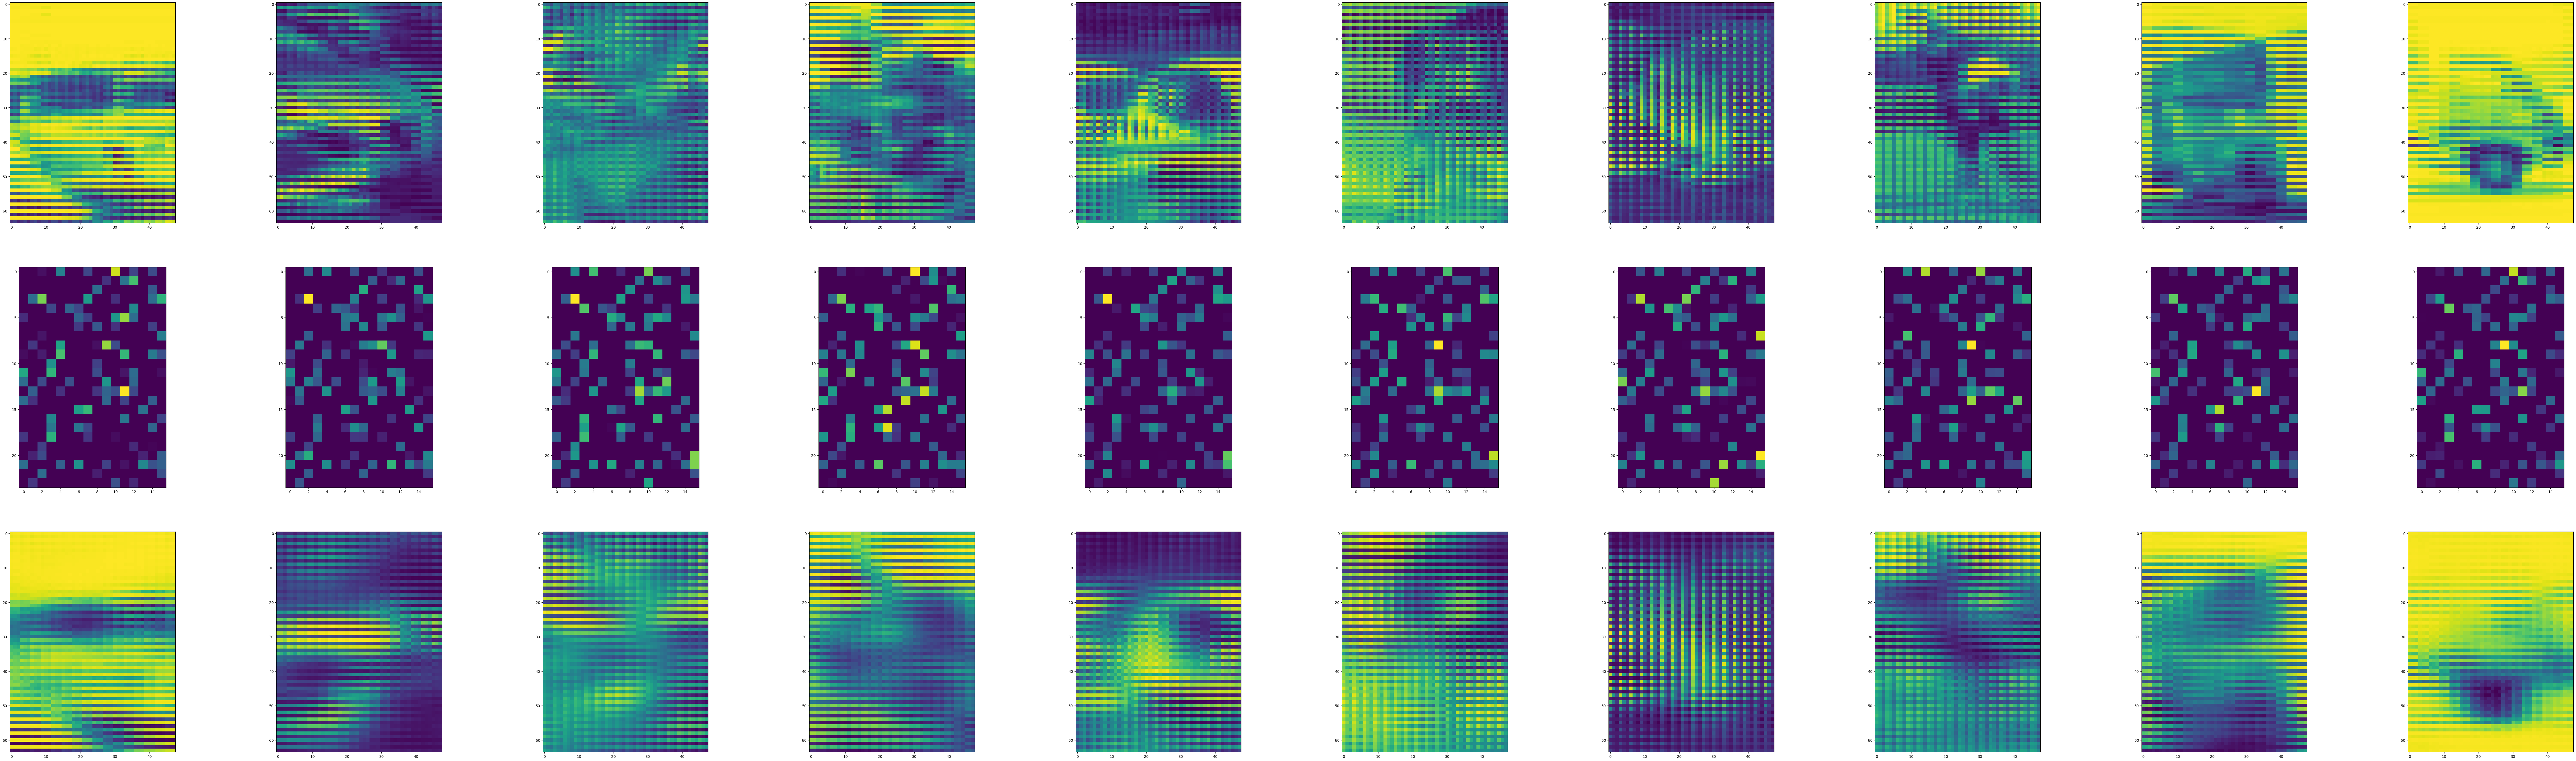

In [34]:
images_num = 10
test_images = np.random.randint(X_test.shape[0], size=images_num)
plt.figure(figsize=(128, 128))

for i, image_idx in enumerate(test_images):
    #Imagem Orginal
    eixo = plt.subplot(10, 10, i + 1)
    plt.imshow(X_test[image_idx].reshape(64, 48))
    plt.xticks()
    plt.yticks()
    
    #Imagem Codificada
    eixo = plt.subplot(10, 10, i + 1 + images_num)
    plt.imshow(codified_images[image_idx].reshape(24, 16))
    plt.xticks()
    plt.yticks()
    
    #Imagem Orginal
    eixo = plt.subplot(10, 10, i + 1 + images_num * 2)
    plt.imshow(decodified_images[image_idx].reshape(64, 48))
    plt.xticks()
    plt.yticks()